### Inverse kinematics of `Panda`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mujoco_parser import MuJoCoParserClass
np.set_printoptions(precision=2)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("Ready.")

Ready.


### Numerical inverse kinematics

Creating window glfw
Creating offscreen glfw


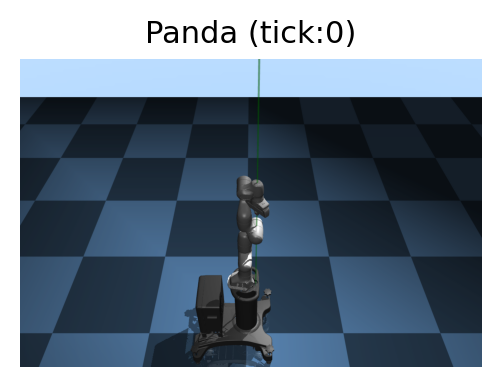

In [2]:
env = MuJoCoParserClass(name='Panda',xml_path='../asset/panda/franka_panda.xml')
env.plot_scene(figsize=(5,2),title_str='Panda (tick:%d)'%(env.tick),title_fs=11)

### IK with position only

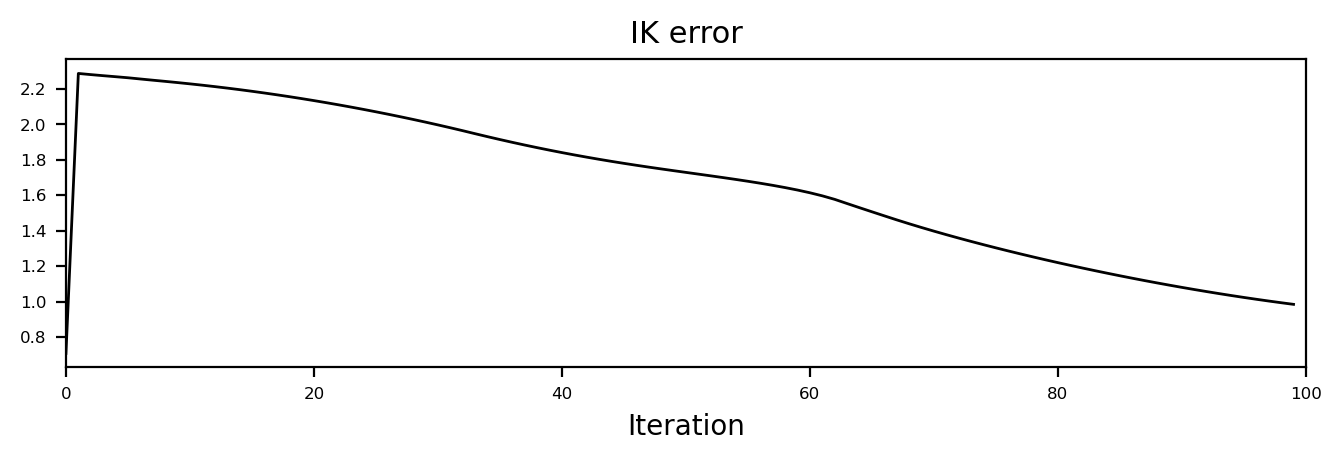

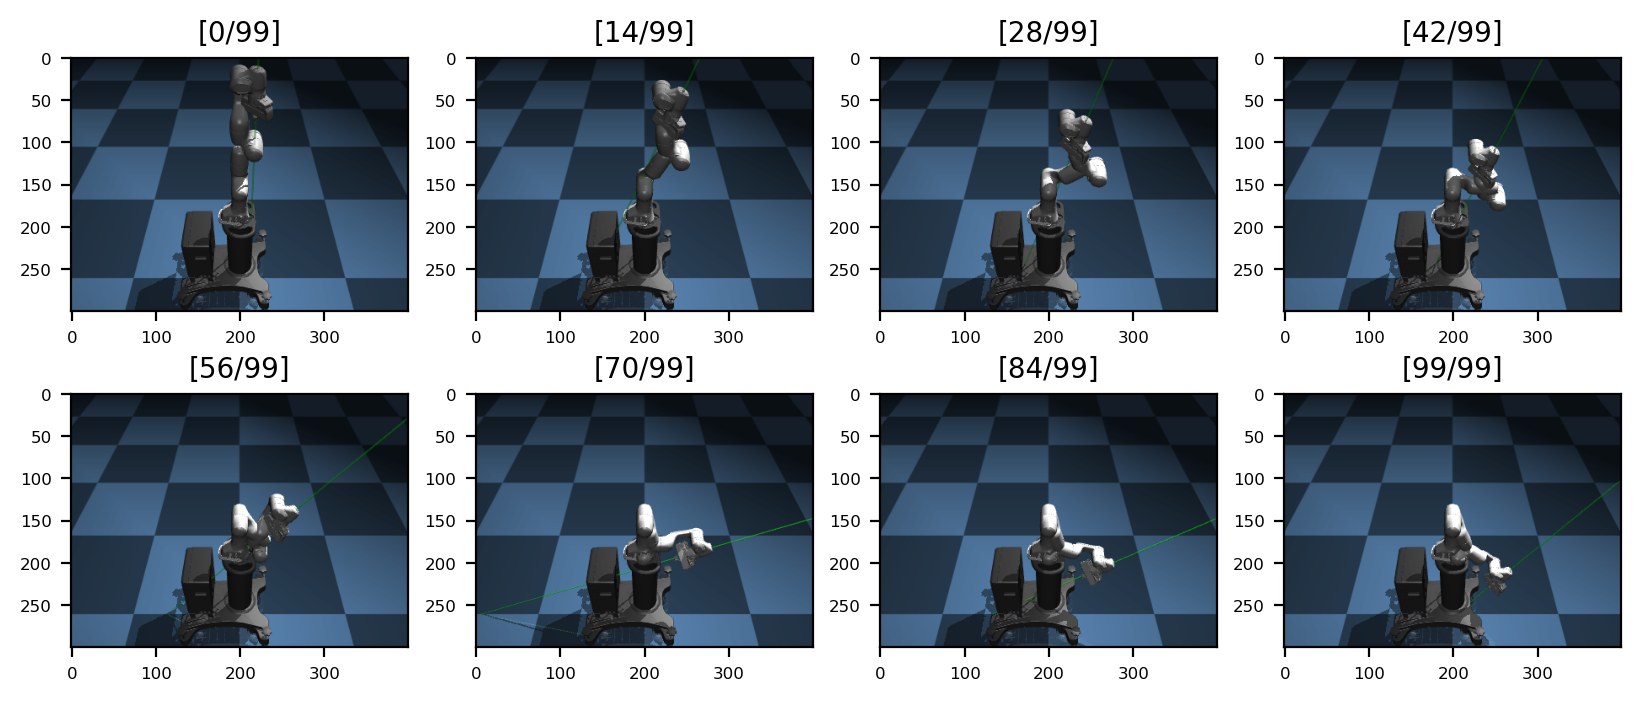

Done.


In [3]:
env.init_viewer(window_width=0.3,window_height=0.3,
                cam_azimuth=80.0,cam_distance=3.0,
                cam_elevation=-30.0,cam_lookat=np.array([0,0,1.5]))
env.reset()
max_tick = 100
q_list   = np.zeros((max_tick,env.n_rev_joint))
# Prepare for IK
body_name = 'panda_eef' # panda_eef / panda_link_4 / panda_link_5 / panda_link_6
q         = env.get_q_pos(q_pos_idxs=env.rev_joint_idxs)
p_EE      = env.get_p_body(body_name=body_name)
R_EE      = env.get_R_body(body_name=body_name)
p_trgt    = p_EE + np.array([0.5,0.0,-0.5])
R_trgt    = None
err_list  = np.zeros(max_tick)
q_list    = np.zeros((max_tick,env.n_rev_joint))
while env.tick < max_tick:
    dq,err = env.one_step_ik(body_name=body_name,p_trgt=p_trgt,R_trgt=R_trgt,stepsize=3.0*np.pi/180.0)
    q = q + dq
    # FK
    env.forward(q_pos=q,q_pos_idxs=env.rev_joint_idxs)
    env.add_marker(env.get_p_body(body_name),radius=0.1,color=np.array([1,0,0,0.5]))
    env.add_marker(p_trgt,radius=0.1,color=np.array([0,0,1,0.5])) 
    env.render(RENDER_ALWAYS=True)
    # Append
    err_list[env.tick-1] = np.linalg.norm(err)
    q_list[env.tick-1,:] = env.get_q_pos(q_pos_idxs=env.rev_joint_idxs)
# Plot IK error
plt.figure(figsize=(8,2))
plt.plot(err_list,ls='-',color='k',lw=1)
plt.title('IK error',fontsize=11)
plt.xlabel('Iteration',fontsize=10)
plt.xlim(0,max_tick)
plt.show()
# Plot snapshots of Panda
fig = plt.figure(figsize=(10,4))
for idx,tick in enumerate(np.linspace(0,max_tick-1,8).astype(np.int32)):
    env.forward(q_pos=q_list[tick,:],q_pos_idxs=env.rev_joint_idxs)
    img = env.plot_scene(render_w=400,render_h=300,
                         cam_distance=2.0,cam_elevation=-45,cam_lookat=[0,0,1.25],RETURN_IMG=True)
    ax = fig.add_subplot(2,4,idx+1)
    ax.imshow(img)
    ax.set_title('[%d/%d]'%(tick,max_tick-1),fontsize=10)
plt.show()        
print ("Done.")

### IK with both position and rotation

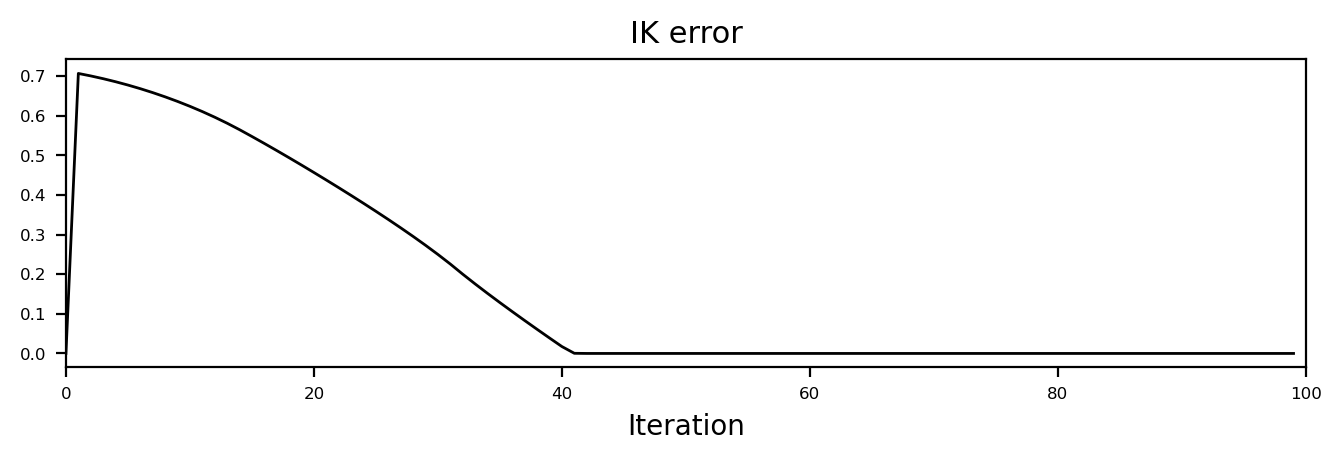

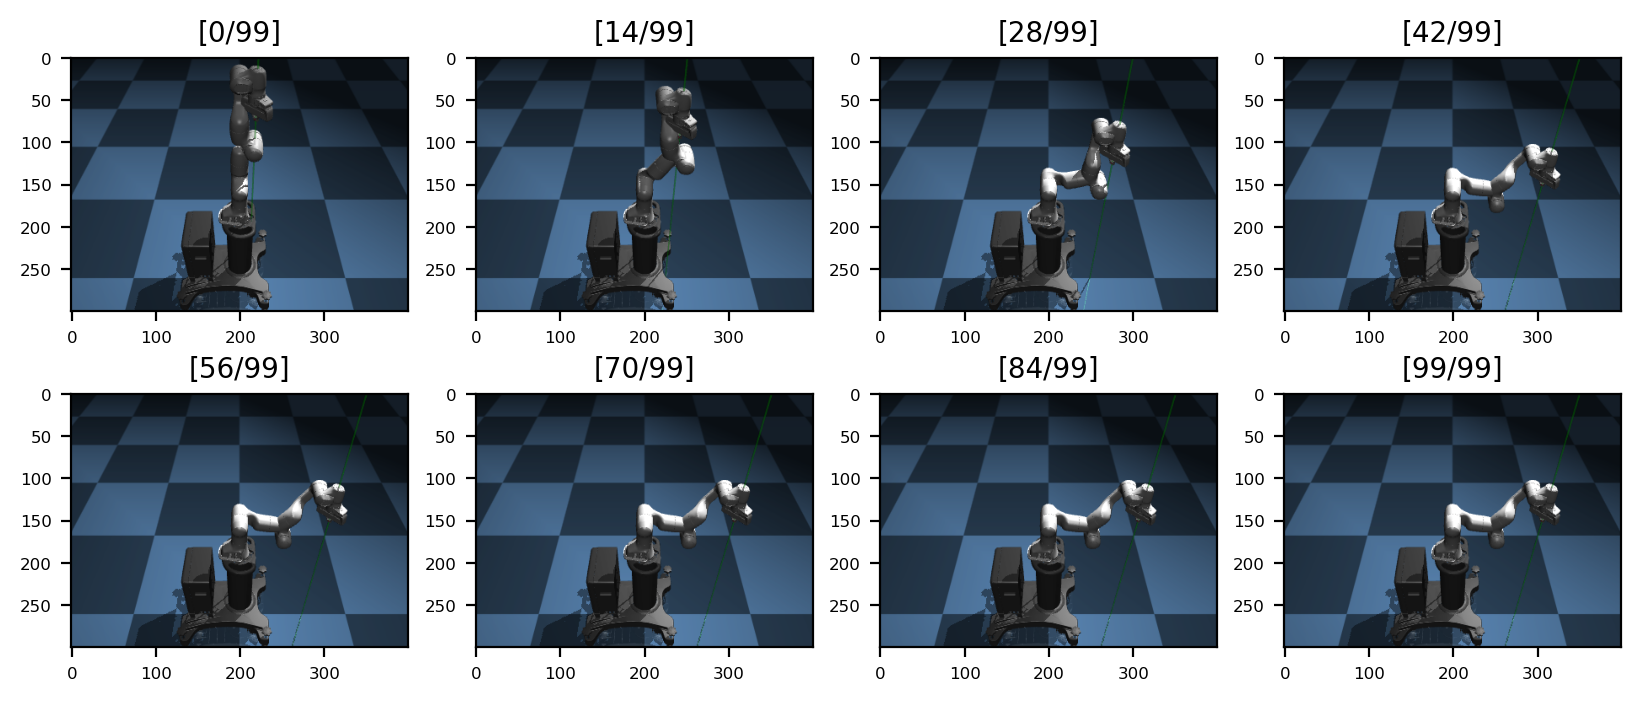

Done.


In [4]:
env.init_viewer(window_width=0.3,window_height=0.3,
                cam_azimuth=80.0,cam_distance=3.0,
                cam_elevation=-30.0,cam_lookat=np.array([0,0,1.5]))
env.reset()
env.forward(q_pos=env.get_q_pos(q_pos_idxs=env.rev_joint_idxs),q_pos_idxs=env.rev_joint_idxs)
max_tick = 100
q_list   = np.zeros((max_tick,env.n_rev_joint))
# Prepare for IK
body_name = 'panda_eef' # panda_eef / panda_link_4 / panda_link_5 / panda_link_6
q         = env.get_q_pos(q_pos_idxs=env.rev_joint_idxs)
p_EE      = env.get_p_body(body_name=body_name)
R_EE      = env.get_R_body(body_name=body_name)
p_trgt    = p_EE + np.array([0.5,0.0,-0.5])
R_trgt    = R_EE
err_list  = np.zeros(max_tick)
q_list    = np.zeros((max_tick,env.n_rev_joint))
while env.tick < max_tick:
    dq,err = env.one_step_ik(body_name=body_name,p_trgt=p_trgt,R_trgt=R_trgt,stepsize=3.0*np.pi/180.0)
    q = q + dq
    # FK
    env.forward(q_pos=q,q_pos_idxs=env.rev_joint_idxs)
    env.add_marker(env.get_p_body(body_name),radius=0.1,color=np.array([1,0,0,0.5]))
    env.add_marker(p_trgt,radius=0.1,color=np.array([0,0,1,0.5])) 
    env.render(RENDER_ALWAYS=True)
    # Append
    err_list[env.tick-1] = np.linalg.norm(err)
    q_list[env.tick-1,:] = env.get_q_pos(q_pos_idxs=env.rev_joint_idxs)
# Plot IK error
plt.figure(figsize=(8,2))
plt.plot(err_list,ls='-',color='k',lw=1)
plt.title('IK error',fontsize=11)
plt.xlabel('Iteration',fontsize=10)
plt.xlim(0,max_tick)
plt.show()
# Plot snapshots of Panda
fig = plt.figure(figsize=(10,4))
for idx,tick in enumerate(np.linspace(0,max_tick-1,8).astype(np.int32)):
    env.forward(q_pos=q_list[tick,:],q_pos_idxs=env.rev_joint_idxs)
    img = env.plot_scene(render_w=400,render_h=300,
                         cam_distance=2.0,cam_elevation=-45,cam_lookat=[0,0,1.25],RETURN_IMG=True)
    ax = fig.add_subplot(2,4,idx+1)
    ax.imshow(img)
    ax.set_title('[%d/%d]'%(tick,max_tick-1),fontsize=10)
plt.show()
print ("Done.")